<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Goal" data-toc-modified-id="The-Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Goal</a></span></li><li><span><a href="#The-Algorithm" data-toc-modified-id="The-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Algorithm</a></span><ul class="toc-item"><li><span><a href="#Compute-$^{d}\mathcal{C}$-matrices" data-toc-modified-id="Compute-$^{d}\mathcal{C}$-matrices-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Compute $^{d}\mathcal{C}$ matrices</a></span></li><li><span><a href="#Getting-the-'expected'-data" data-toc-modified-id="Getting-the-'expected'-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Getting the 'expected' data</a></span></li><li><span><a href="#Checking-for-sequence-patterns" data-toc-modified-id="Checking-for-sequence-patterns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Checking for sequence patterns</a></span></li><li><span><a href="#Making-several-sequences-for-an-average-expected-co-occurrence" data-toc-modified-id="Making-several-sequences-for-an-average-expected-co-occurrence-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Making several sequences for an average expected co-occurrence</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Putting-it-all-together" data-toc-modified-id="Putting-it-all-together-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Putting it all together</a></span></li></ul></li><li><span><a href="#Datasets-used-for-illustration" data-toc-modified-id="Datasets-used-for-illustration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Datasets used for illustration</a></span><ul class="toc-item"><li><span><a href="#Amino-acid-sequences" data-toc-modified-id="Amino-acid-sequences-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Amino acid sequences</a></span></li><li><span><a href="#Nyctibatrachus-humayuni:-a-frog-with-a-small-repertoire" data-toc-modified-id="Nyctibatrachus-humayuni:-a-frog-with-a-small-repertoire-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><em>Nyctibatrachus humayuni</em>: a frog with a small repertoire</a></span></li><li><span><a href="#Pseudophilautus-amboli:-a-frog-with-a-large-repertoire" data-toc-modified-id="Pseudophilautus-amboli:-a-frog-with-a-large-repertoire-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><em>Pseudophilautus amboli</em>: a frog with a large repertoire</a></span></li></ul></li><li><span><a href="#Sanity-checks" data-toc-modified-id="Sanity-checks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sanity checks</a></span><ul class="toc-item"><li><span><a href="#Looking-for-amino-acid-co-occurrence-in-protein-sequences" data-toc-modified-id="Looking-for-amino-acid-co-occurrence-in-protein-sequences-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Looking for amino acid co-occurrence in protein sequences</a></span></li><li><span><a href="#Marginal-probabilities-are-recovered" data-toc-modified-id="Marginal-probabilities-are-recovered-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Marginal probabilities are recovered</a></span></li></ul></li><li><span><a href="#Including-silence-and-asymmetry-to-check-for-emission-syntax" data-toc-modified-id="Including-silence-and-asymmetry-to-check-for-emission-syntax-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Including silence and asymmetry to check for emission syntax</a></span><ul class="toc-item"><li><span><a href="#N.-humayuni" data-toc-modified-id="N.-humayuni-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><em>N. humayuni</em></a></span></li><li><span><a href="#P.-amboli" data-toc-modified-id="P.-amboli-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><em>P. amboli</em></a></span></li></ul></li><li><span><a href="#Dependence-on-window-size-$d$" data-toc-modified-id="Dependence-on-window-size-$d$-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dependence on window size $d$</a></span><ul class="toc-item"><li><span><a href="#N.-humayuni" data-toc-modified-id="N.-humayuni-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><em>N. humayuni</em></a></span></li><li><span><a href="#P.-amboli" data-toc-modified-id="P.-amboli-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><em>P. amboli</em></a></span></li></ul></li><li><span><a href="#Examining-different-social-contexts" data-toc-modified-id="Examining-different-social-contexts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Examining different social contexts</a></span><ul class="toc-item"><li><span><a href="#N.-humayuni" data-toc-modified-id="N.-humayuni-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><em>N. humayuni</em></a></span></li><li><span><a href="#P.-amboli" data-toc-modified-id="P.-amboli-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span><em>P. amboli</em></a></span></li></ul></li></ul></div>

# The Goal

If we are provided with a dataset of bouts produced by a given organism, we wish to determine whether some groups of notes are often used in conjunction with each other. The idea is that if two notes are used with each other a lot, then they likely either have some joint function (i.e the phrase has some function), or both notes are used for similar functions (redundancy). This means that we cannot simply count how many times two notes occur near each other, we must come up with a measure that also accounts for the _natural abundance_ of each note.

Thus, we wish to find some measure of how often notes in a bout occur within a distance of $d > 0$ from each other, while also accounting for natural occurrence frequency of the notes.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import matplotlib.colors as colors

# The Algorithm

## Compute $^{d}\mathcal{C}$ matrices


For a fixed value of $d$ (denoted win_size in the code), the code below takes several samples of size $d$ from the dataset, and counts how often two notes are found together in a sample. Once all the sampling is done, we define $N_{ij}$ as the total number of times that the two notes $i$ and $j$ were found in the same sample, and $p_i$ as the total number of times that the note $i$ was found. <br>
Then, we define $^{d}C_{ij}$ as:
$$
    ^{d}C_{ij} = \frac{N_{ij}}{p_{i}\cdot p_{j}}
$$
<br>
The matrix $^{d}\mathcal{C}$ is then defined as the matrix whose $i-j$th element is given by $^{d}C_{ij}$.<br>
Thus, for a species with $\nu$ distinct notes in its repertoire, $^{d}\mathcal{R}$ is a $\nu \times \nu$ matrix, whose $i-j$th element gives a measure of how often the $i$th and $j$th notes occur within a distance of $d$ from each other, relative to how often they are emitted by the animal.

The code returns the matrix $^{d}\mathcal{C}$ as a pandas DataFrame.

In [2]:
def make_stochastic_matrix(df):  #Transform a square matrix such that each row sums up to 1

    new_df = np.array(df.copy())
    for i in range(0, len(new_df)):
        row_sum = 0
        for j in range(0, len(new_df[0])):
            if new_df[i][j] == np.inf or pd.isna(new_df[i][j]):
                pass
            else:
                row_sum += new_df[i][j]
        if row_sum != 0:
            new_df[i] = new_df[i] / row_sum

    return pd.DataFrame(new_df)

In [3]:
def get_MC_occurrence_freqs(df,
                            col_name,
                            note_list,
                            win_size,
                            n=10000,
                            symmetric=False):
    '''
    col_name is the name of the column that contains all the sequences
    note_list is a list that contains the possible values that a note in your sequence can take
    win_size is the window size, which is the maximum distance between two notes that you are looking for
    n is the number of Monte Carlo runs that should be conducted
    '''

    occurrence_vec = np.zeros(len(note_list))
    co_occurrence_matrix = np.zeros((len(note_list), len(note_list)))

    notes = np.array(note_list)
    note_indices = list(np.arange(0, len(note_list), 1))

    for i in range(0, df.shape[0]):  #For each sequence in the dataset
        sequence = list(df[col_name][i])

        for run in range(0, n):  #For each Monte-Carlo run

            #Pick a random index from a uniform(0,len(sequence)-win_size) distribution
            rand_index = np.random.randint(0, max(len(sequence) - win_size, 1))

            #Generate a random sample using this index value
            sample = sequence[rand_index:rand_index + win_size]

            for i in range(0, len(sample)):

                note = sample[i]  #For each individual note in the sample

                #Find out which note it is
                try:
                    noteID = int(note_indices[np.where(note == notes)[0][0]])
                except IndexError:
                    continue  #If the note is not in the note_list provided, skip it

                #Add to the occurrence vector
                occurrence_vec[noteID] += 1

                for j in range(0, len(
                        sample)):  #Look at all the other notes in the sample

                    othernote = sample[j]
                    try:
                        othernoteID = int(
                            note_indices[np.where(othernote == notes)[0][0]])

                    except IndexError:
                        continue  #If the note is not in the note_list provided, skip it

                    if symmetric:

                        if noteID == othernoteID and i != j:  #To avoid counting the same note twice, ensure indices are not equal

                            co_occurrence_matrix[noteID][othernoteID] += 1

                        elif noteID != othernoteID:

                            co_occurrence_matrix[noteID][othernoteID] += 1

                    else:

                        if i < j:  #This breaks the symmetry: Only count if note occurred before othernote

                            co_occurrence_matrix[noteID][othernoteID] += 1

    for i in range(0, len(note_list)):
        for j in range(0, len(note_list)):
            if occurrence_vec[i] * occurrence_vec[j] != 0:
                co_occurrence_matrix[i][j] = (co_occurrence_matrix[i][j]) / (
                    occurrence_vec[i] * occurrence_vec[j])

    marginal_probs = occurrence_vec / np.sum(
        occurrence_vec)  #Probability of occurrence

    co_occurrence_matrix = make_stochastic_matrix(
        pd.DataFrame(co_occurrence_matrix))

    return co_occurrence_matrix, marginal_probs

## Getting the 'expected' data

The code given below takes in a dataframe of data collected from the field (this is used so that all sequence lengths of the new data is equal to the sequence lengths of the observed data in the field). It also requires a stationary distribution of occurrence probabilities as an input. <br>
Given these inputs, the code generates sequences where the notes are distributed 'randomly', according to their stationary distribution.

Note that this stationary distribution is just the simplest possible choice for the 'expected' data. If one has reason to suspect that the sequences being studied are generated through specific processes, such as Markovian, semi-Markovian or renewal processes, one can use the same broad rationale to check whether the data aligns with the expectations by changing what constitutes the 'expected' data. This algorithm thus also provides a method to assess the performance of various stochastic models (Markov, renewal, etc) in faithfully reproducing the observed sequence patterns, and presents an alernative to the Levenshtein edit distance, another metric that has been used to compare the similarity of animal vocal sequences.

In [4]:
def make_new_sequences(df,
                       col_name,
                       notes,
                       marginal_probs):
    #Make a dataframe of random sequences given occurrence probabilities
    '''
    df is a dataframe of sequences
    col_name is the name of the column in df that contains all the sequences
    notes is a list or array that contains the possible values that a note in your sequence can take
    marginal_probs is a list that provides the stationary occurrence probability (frequency) of each note in note_list
    '''

    notes = np.array(notes)
    note_indices = list(np.arange(0, len(notes), 1))
    newdata = []

    cdf_cuts = np.zeros(len(marginal_probs) + 1)
    cdf = 0
    for i in range(1, len(marginal_probs) + 1):
        cdf += marginal_probs[i - 1]
        cdf_cuts[i] = cdf

    cdf_cuts[len(marginal_probs)] = 1

    for index in range(0, df.shape[0]):
        new_seq = ''
        seq_len = len(list(df[col_name][index]))

        for element in range(0, seq_len):
            rd = np.random.uniform()  #Pick a random float between 0 and 1

            for j in range(0,
                           len(cdf_cuts) -
                           1):  #Simulate a stationary distribution

                if cdf_cuts[j] <= rd and rd <= cdf_cuts[j + 1]:
                    note_index = note_indices[j]
                    note = notes[np.where(note_indices == note_index)[0][0]]

            new_seq += str(note)

        newdata.append(new_seq)

    newdata = pd.DataFrame(newdata)
    newdata = newdata.rename(mapper={0: col_name}, axis='columns')

    return newdata

## Checking for sequence patterns

We can now see how different the observed co-occurrence ($^{d}\mathcal{C}$ obtained from the data) is from the expected co-occurrence ($^{d}\mathcal{C}$ obtained from the 'random' data that we synthesized). To do this effectively, we first row-normalize both the $^{d}\mathcal{C}$ matrices (to make it more like a 'probability'), and then define a new matrix, $^{d}\mathcal{R}$, whose $i-j$th element is given by:
$$
^{d}R_{ij} = \frac{(^{d}C_{ij})_{\textrm{observed}}}{(^{d}C_{ij})_{\textrm{expected}}}
$$
<br>

Thus, for a species with $\nu$ distinct notes in its repertoire, $^{d}\mathcal{R}$ is a $\nu \times \nu$ matrix, whose $i-j$th element gives the ratio of the observed co-occurrence of the $i$th and $j$th notes to the expected co-occurrence of the $i$th and $j$th notes, if notes were distributed randomly. A value of $^{d}R_{ij}$ that is greater than 1 indicates that the notes occur within a distance of $d$ from each other more often than expected if notes were distributed randomly, and a value less than 1 indicates that the notes occur within a distance of $d$ from each other less frequently than expected if notes were distributed randomly. In this sense, we can think of each entry of this matrix as being analogous to the *relative risk* measure that's commonly used in biological and medical studies.

## Making several sequences for an average expected co-occurrence

Since the sequences generated using marginal probabilities are random (by construction), generating several datasets of such random ('null') sequences and averaging over them would provide a much more robust meausre of expected co-occurrence. Below, I implement a function in which *runs* specieis how many such datasets to average over.

In [5]:
def check_for_co_occurrence(df,
                            col_name,
                            note_list,
                            win_size,
                            n=10000,
                            runs=100,
                            symmetric=True):

    original_co_occur, marginal_probs = get_MC_occurrence_freqs(
        df, col_name, note_list, win_size, n, symmetric)

    avg_co_occur = np.zeros((len(note_list), len(note_list)))

    for run in range(0, runs):
        newdata = make_new_sequences(df, col_name, note_list, marginal_probs)
        new_co_occur = np.array(
            get_MC_occurrence_freqs(newdata, col_name, note_list, win_size, n,
                                    symmetric)[0])

        for i in range(0, len(note_list)):
            for j in range(0, len(note_list)):
                avg_co_occur[i][j] += new_co_occur[i][j] / runs

    return original_co_occur, avg_co_occur

In [51]:
def normalized_deviation(obs, exp, max_allowed=5):
    '''
    obs is the dataframe of observed co-occurrences
    exp is the dataframe of expected co-occurrences
    '''

    ratio = np.array(obs / exp)

    #Make all values lie in the open interval [0,max_allowed]
    for i in range(0, len(ratio)):
        for j in range(0, len(ratio)):
            if ratio[i][j] > max_allowed:
                ratio[i][j] = max_allowed

            #Prevent small deviations around values like 0/0 from skewing the results
            if abs(obs[i][j] - 0) <= 10**-2 and abs(exp[i][j] - 0) <= 10**-2:
                ratio[i][j] = 1

    return pd.DataFrame(ratio)

## Visualization

The matrix $^{d}\mathcal{R}$ can be effectively visualized using a heatmap that is centered at 1.

In [7]:
def make_heatmap(df,
                 lab,
                 title='',
                 save=False,
                 file='heatmap',
                 cmap='icefire',
                 max_allowed=5):

    import math
    from matplotlib.colors import LogNorm

    fig, ax = plt.subplots(figsize=(12, 7))
    title = title
    plt.title(title, fontsize=18)

    #Scale is set to be in the interval [0,max_allowed], centered at 1
    hmap = sns.heatmap(df,
                       xticklabels=lab,
                       yticklabels=lab,
                       cmap=cmap,
                       norm=colors.TwoSlopeNorm(vmin=0,
                                                vcenter=1,
                                                vmax=max_allowed))
    hmap.figure.axes[-1].set_ylabel('observed:expected ratio', size=22)

    if save:
        plt.savefig(
            (file + ".svg"),
            dpi=500)  #Save the file as an SVG with a resolution of 500 dpi

    plt.show()

## Putting it all together

In [8]:
def co_occurrence(dat,
                  col_name,
                  lab,
                  win_size,
                  n,
                  runs,
                  max_allowed,
                  symmetric=True,
                  save=False,
                  title='',
                  file='co_occur_heatmap'):

    obs, exp = check_for_co_occurrence(df, col_name, lab, win_size, n, runs,
                                       symmetric)

    make_heatmap(normalized_deviation(obs, exp, max_allowed),
                 lab,
                 title,
                 save,
                 file,
                 max_allowed=max_allowed)

# Datasets used for illustration

## Amino acid sequences

I use publicly available data from [Dunbrack lab](http://dunbrack.fccc.edu/Guoli/pisces_download.php#culledpdb) (In particular, I used the file "cullpdb_pc20_res1.6_R0.25_d210225_chains3824.fasta") to look at patterns in amino acid sequences (see 4.1 below).  I got the idea of looking at protein sequences from Adithyan Unni, a friend and batchmate currently (as of Feb 2021) working in [COSPI (Dr. M.S. Madhusudhan's lab)](http://cospi.iiserpune.ac.in/cospi/) at IISER Pune.

In [17]:
#For analyzing amino acid sequences which are saved as FASTA files. Copied entirely from Adithyan.

from Bio import SeqIO  #download the 'biopython' package

#below should give you a list of lists - the smaller lists are individual sequences
seq_list = []
for record in SeqIO.parse(
        r'data/cullpdb_pc20_res1.6_R0.25_d210225_chains3824.fasta',
        'fasta'):
    seq = list(record.seq)
    seq_list.append(seq)

# Create the vocabulary list (i.e list of 'notetypes') - 20 amino acids
vocab_list = list(
    set(list('QWERTYUIOPASDFGHJKLZXCVBNM')) -
    set(['B', 'O', 'J', 'U', 'Z', 'X']))

# below creates a dictionary with total counts for all 20 amino acid across all sequences

total_list = []
for seq in seq_list:
    total_list.extend(seq)

voc_dict = {}
for i in vocab_list:
    voc_dict[i] = total_list.count(i)

In [18]:
#Convert the data into the format I need
protein_data = []
for i in range(0, len(seq_list)):
    seq = str('')
    for j in range(0, len(seq_list[i])):
        try:
            seq += str(seq_list[i][j])
        except TypeError:
            pass
    protein_data.append(seq)

In [19]:
protein_data = pd.DataFrame(protein_data)
protein_data.columns = ['sequences']
protein_data.head()

,sequences
0,TTEENSKSEALLDIPMLEQYLELVGPKLITDGLAVFEKMMPGYVSV...
1,GSHMTFTSFQLEELEKAFSRTHYPDVFTREELAMKIGLTEARIQVW...
2,REATWVTEKPLTLKIHMHFRDKWVWDENWPVAREVARLTNVKLVGV...
3,PPGPPGPPGPPGPVGPPGPPGPPGPPG
4,METAIITLSKDGRITEWNKKAEQLFGLKKENVLGRRLKDLPDFEEI...


## _Nyctibatrachus humayuni_: a frog with a small repertoire

_Nyctibatrachus humayuni_ is a frog that is endemic to the Western Ghat mountain range of India. The frog has a vocal repertoire consisting of two notes - an 'ascending note' (AN) and a 'descending note' (DN). We found that the proportion of notes emitted which are DNs varies with behavioral context (see main paper). <br>
<br>
Below is a dataset consisting of vocal sequences of individuals converted into strings (0 denotes silence, 1 denotes an AN, and 2 denotes a DN) and the social context ('A' for a lone male and 'N_A' for a male vocalizing with vocal conspecifics close by) in which the individuals were vocalizing.

In [14]:
nycti_path = 'data/nycti/seqdata_sil.csv'
nycti_dat = pd.read_csv(nycti_path)

nycti_dat['seqlist'] = [
    str(nycti_dat['seqlist'][i]) for i in range(0, len(nycti_dat['seqlist']))
]

nycti_dat.head()

,Unnamed: 0,inds,contextlist,seqlist
0,1,ZOOM0522,A,1200000000001000000000100000000001200000000001...
1,2,ZOOM0515,N_A,1200000000000000001200000000000000001200000000...
2,3,ZOOM0518,N_A,1200000100010200001020000010200012000100001000...
3,4,ZOOM0520,N_A,1020000012000000100000100001200000001200000010...
4,5,ZOOM0476,A,1000000000100000000100000000100000010000000010...


## _Pseudophilautus amboli_: a frog with a large repertoire

_Pseudophilautus amboli_ is another frog species that is endemic to the Western Ghats of India. This species has a vocal repertoire of 6 note types, which it arranges in various manners. We found that notetypes 1,2 and 3 likely serve an advertisement function, whereas notetypes 4 and 5 likely serve a territorial function (see main text).<br>
<br>
Below is a dataset consisting of vocal sequences of individuals of _P. amboli_ converted into strings (0 corresponds to silence, and numbers 1 through 6 correspond to notetypes 1 through 6 respectively), and the social context in which the individuals were vocalizing ('A' for vocalizing alone, 'N_A' for vocalizing in the presence of vocal conspecifics, and 'T_D' for males engaged in a territorial dispute - see main text for details)

In [15]:
pseudo_path = 'data/pseudo/seqdata_sil.csv'
pseudo_dat = pd.read_csv(pseudo_path)

pseudo_dat['seqlist'] = [
    str(pseudo_dat['seqlist'][i]) for i in range(0, len(pseudo_dat['seqlist']))
]

pseudo_dat.head()

,Unnamed: 0,inds,contextlist,seqlist
0,1,MZ001013,A,3333333302002002002002002002000133333002001001...
1,2,MZ001020,A,2333333300200120200020002002000020002000200020...
2,3,MZ001021,A,2000001002001300200200200002002002000200200200...
3,4,MZ001022,A,2020020020020002002020012200133300100220023333...
4,5,MZ001023,A,1200100200220002000200020000100000600006006000...


# Sanity checks

## Looking for amino acid co-occurrence in protein sequences

We know that in proteins, cysteine residues tend to occur close to each other, since Cystine (Cys-Cys) is frequently formed. For similar reasons, Histidine residues also tend to occur close to each other. I show that my algorithm can uncover these patterns.

In [20]:
prot_obs, prot_exp = check_for_co_occurrence(protein_data,
                                             col_name='sequences',
                                             note_list=np.array(vocab_list),
                                             win_size=3,
                                             n=1000,
                                             runs=50)

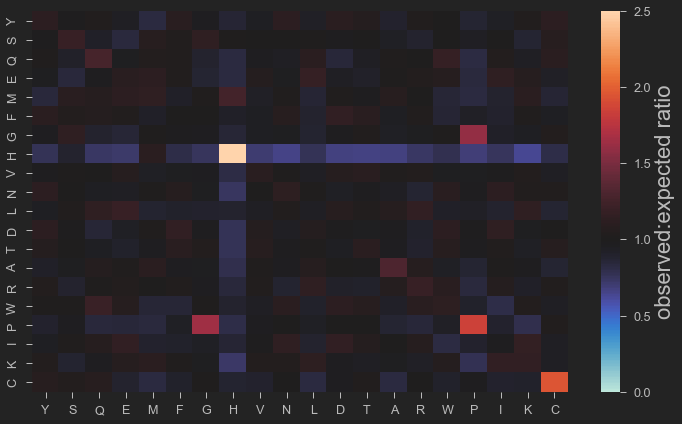

In [21]:
max_allowed = 2.5

make_heatmap(normalized_deviation(prot_obs, prot_exp, max_allowed=max_allowed),
             lab=vocab_list,
             cmap='icefire',
             max_allowed=max_allowed,
             save=True,
             file='protein_heatmap')

## Marginal probabilities are recovered

If our counting is right, the marginal probabilities we get when we use our algorithm should closely match the probabilities obtained by directly calculating the frequency of occurrence of each notetype.

In [23]:
marginal_probs = get_MC_occurrence_freqs(
    pseudo_dat,
    col_name='seqlist',
    note_list=['0', '1', '2', '3', '4', '5', '6'],
    win_size=6,
    n=10000)[1]

#Marginal probabilities according to our algorithm
print(marginal_probs)

[0.12420948 0.34911242 0.30962092 0.05108105 0.14732222 0.01865392]


In [21]:
#Actual dataset of the vocalizations
notedat = pd.read_csv(
    'data/pseudo/notetype_proportion_data.csv'
)

notedat.head()

,Unnamed: 0,ID,context,type_1_prop,type_2_prop,type_3_prop,type_4_prop,type_5_prop,type_6_prop
0,1,MZ001013,A,0.254545,0.254545,0.490909,0.0,0.0,0.00000
1,2,MZ001020,A,0.019231,0.653846,0.326923,0.0,0.0,0.00000
2,3,MZ001021,A,0.163265,0.510204,0.326531,0.0,0.0,0.00000
3,4,MZ001022,A,0.085106,0.659574,0.255319,0.0,0.0,0.00000
4,5,MZ001023,A,0.119048,0.285714,0.119048,0.0,0.0,0.47619


In [22]:
#Directly count frequencies
notedat = notedat.iloc[0:notedat.shape[0], 3:notedat.shape[1]]

notedat.mean(axis=0)

type_1_prop    0.129525
type_2_prop    0.359057
type_3_prop    0.299648
type_4_prop    0.050239
type_5_prop    0.144441
type_6_prop    0.017089
dtype: float64

Thus, we see that the values obtained by our algorithm do indeed closely match the actual frequencies of the notetypes in the data.

The occurrence patterns in this case seem to be more or less independent of window size for the values tested. In general, the dependence will depend on the distance scales (in terms of number of notetypes emitted) at which patterns occur in the system, and the right window sizes for any given system will have to be inferred from the biology of the system.

# Including silence and asymmetry to check for emission syntax

The next interesting question we can ask is whether there are any rules underlying how the sequences are generated. This can be implemented by making the co-occurrence counts _asymmetric_. This means that note 'B' is said to co-occur with note 'A' only if B occurs _after_ A within the specified _d_ value. <br>
While doing this in the context of vocal sequences, it is also worthwhile to include silence of some fixed duration as a distinct notetype (coded for as notetype 0 below).
The code below creates the heatmaps presented in figure 5 of Bhat et.al. 2021.

## _N. humayuni_

In [16]:
obs_nyctidat, exp_nyctidat = check_for_co_occurrence(nycti_dat,
                                                     col_name='seqlist',
                                                     note_list=['0', '1', '2'],
                                                     win_size=3,
                                                     n=10000,
                                                     runs=50,
                                                     symmetric=False)

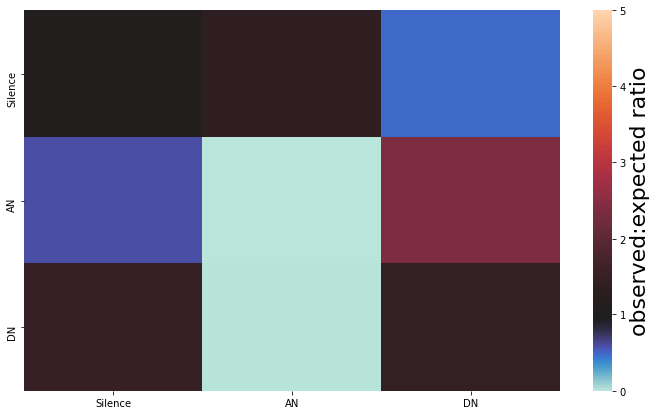

In [20]:
max_allowed = 5

nycti_lab = ["Silence", "AN", "DN"]
make_heatmap(normalized_deviation(obs_nyctidat, exp_nyctidat, max_allowed),
             nycti_lab,
             save=False)

This heatmap tells us the following about the behavior of _N. humayuni_:

 - When an individual is silent, it is likely to emit an AN more often than random, and a DN less often than random.
 - When an individual has emitted an AN, it is very unlikely to emit a second AN, and will instead either emit a DN, or go silent.
 - When an indiidual has emitted a DN, it is very unlikely to emit an AN, and will either emit a second DN, or will go silent.

Taken together, this tells us that _N. humayuni_ has a syntactic system of the form "AN + x\*DN", an emission rule that is notably _not_ best described with simple Markovian dynamics (a renewal process or a HMM would be more appropriate).

## _P. amboli_

One can also conduct the same analysis for the larger repertoire of _P. amboli_.

In [21]:
obs_pseudodat, exp_pseudodat = check_for_co_occurrence(
    pseudo_dat,
    col_name='seqlist',
    note_list=['0', '1', '2', '3', '4', '5', '6'],
    win_size=6,
    n=10000,
    runs=50,
    symmetric=False)

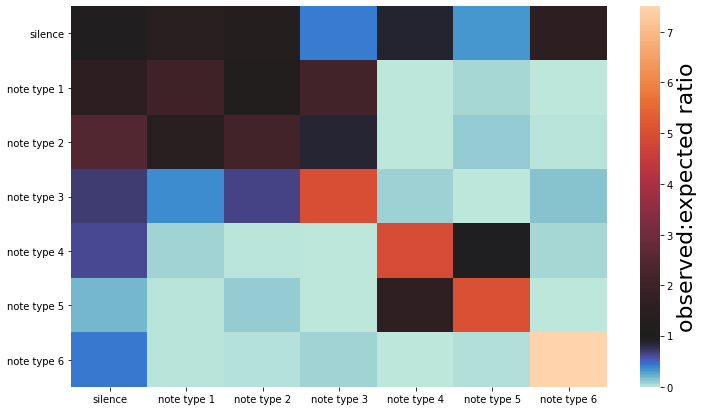

In [23]:
max_allowed = 7.5
pseudo_lab = ["silence", "note type 1", "note type 2", "note type 3", "note type 4",
    "note type 5", "note type 6"]

comparison = normalized_deviation(obs_pseudodat,
                                  exp_pseudodat,
                                  max_allowed=max_allowed)

make_heatmap(comparison,
             pseudo_lab,
             cmap='icefire',
             max_allowed=max_allowed,
             save=False)

From this heatmap, we can discern the following (probabilistic) rules:

 - Do not begin vocalizing with note types 3 or 5
 - If you have emitted note type 1, do not emit note types 1, 4 or 5. Emit 3 more often than going silent.
 - If you have emitted note type 2, do not emit note types 1, 4 or 5. Go silent more often than emitting 3.
 - If you have emitted note type 3, do not emit any note type other than 3. Emit 3 more often than you go silent (Note that this directly leads to chains of consecutive note type 3 being emitted)
 - If you have emitted note type 4, do not emit any note type other than note types 4 or 5. Emit note type 4 more often than you go silent, but go silent more often than you emit note type 5.
 - If you have emitted note type 5, do not emit any note types other than 4 or 5. Emit note type 5 more often than you go silent, and go silent less often than you emit notetype 4.
 
We can also hypothesize that since note types 4 and 5 appear decoupled at this short time scale, they may serve different specific functions, though both serve the same broad function (territorial defense - see main paper) 

# Dependence on window size $d$

It is worthwhile to look at how sensitive the algorithm is to the choice of $d$ value. $d$ should be chosen based on a guess based on the biology of the system, so as to include distinct 'bouts' or 'call groups', whenever possible. When this is not possible, an estimate could be made by using the size of the vocal repertoire as a naive guess for a suitable $d$ value.

The figures presented below are for supplementary material of Bhat et.al. 2021.


## _N. humayuni_

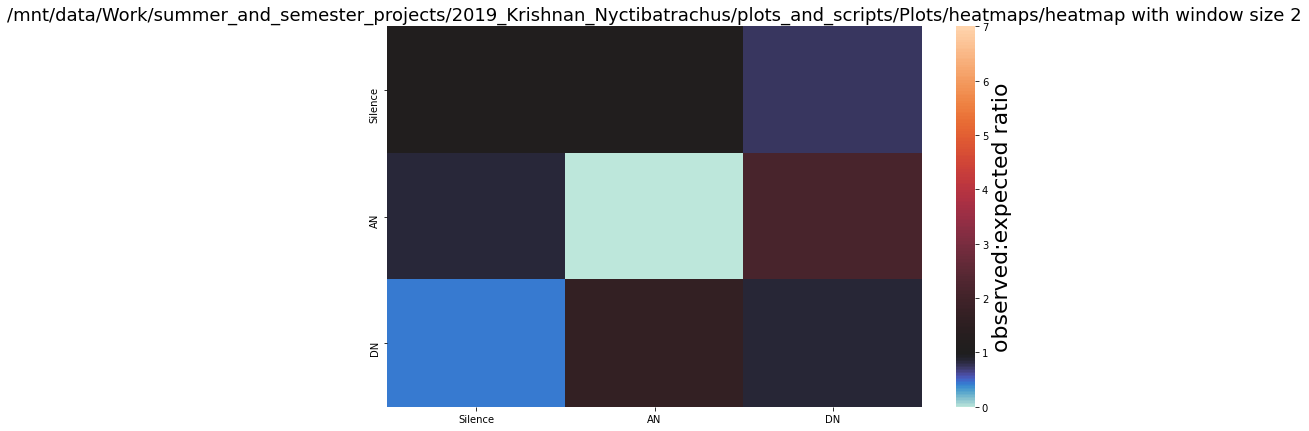

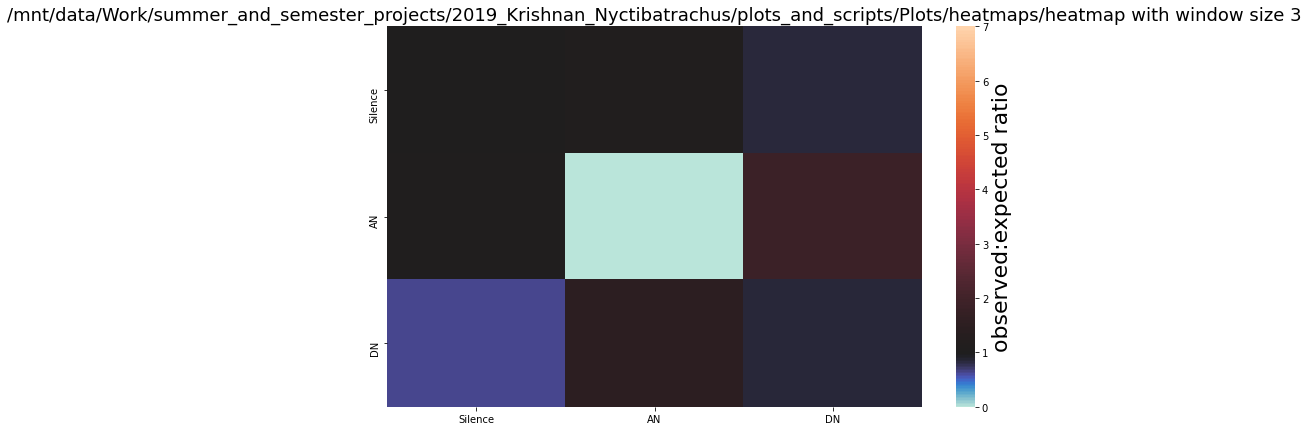

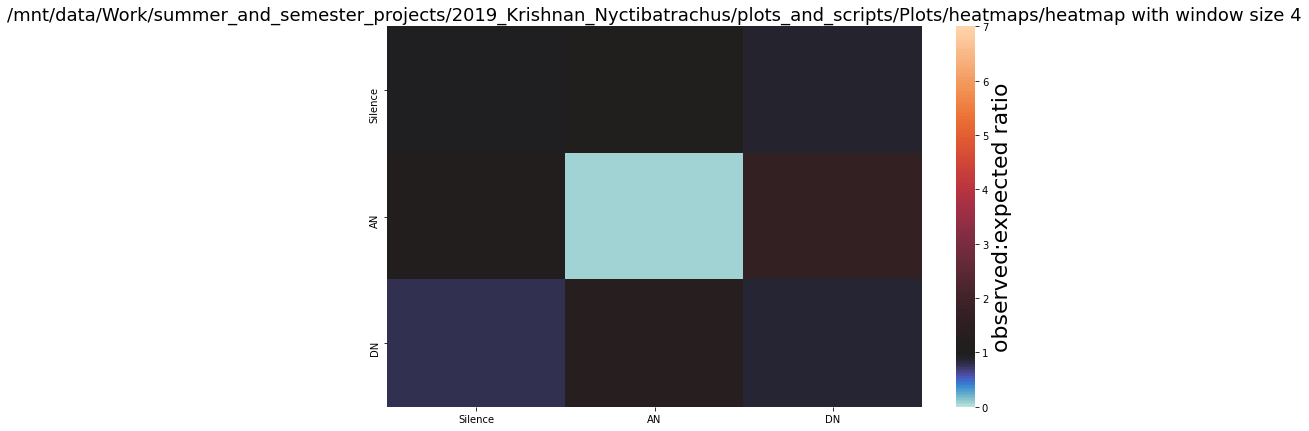

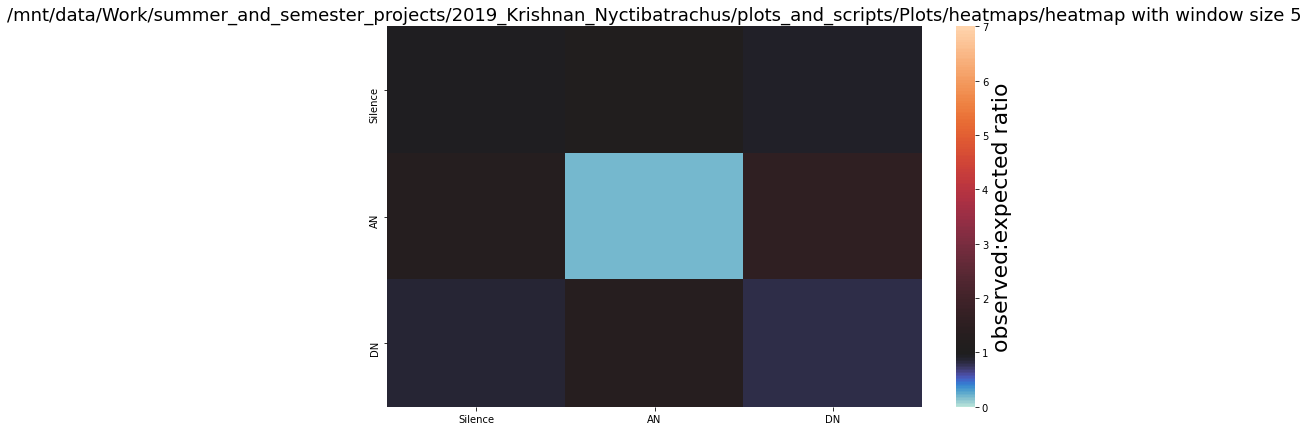

In [25]:
d_dep_nycti = 'supp_A3/'
for win in range(2, 6, 1):
    file = d_dep_nycti + "heatmap with window size " + str(win)
    obs, exp = check_for_co_occurrence(nycti_dat,
                                       col_name='seqlist',
                                       note_list=['0', '1', '2'],
                                       win_size=win,
                                       n=10000,
                                       runs=50)
    make_heatmap(normalized_deviation(obs, exp, 4),
                 lab=nycti_lab,
                 title="heatmap with window size " + str(win),
                 save=True,
                 file=file,
                 cmap='icefire',
                 max_allowed=7)

## _P. amboli_

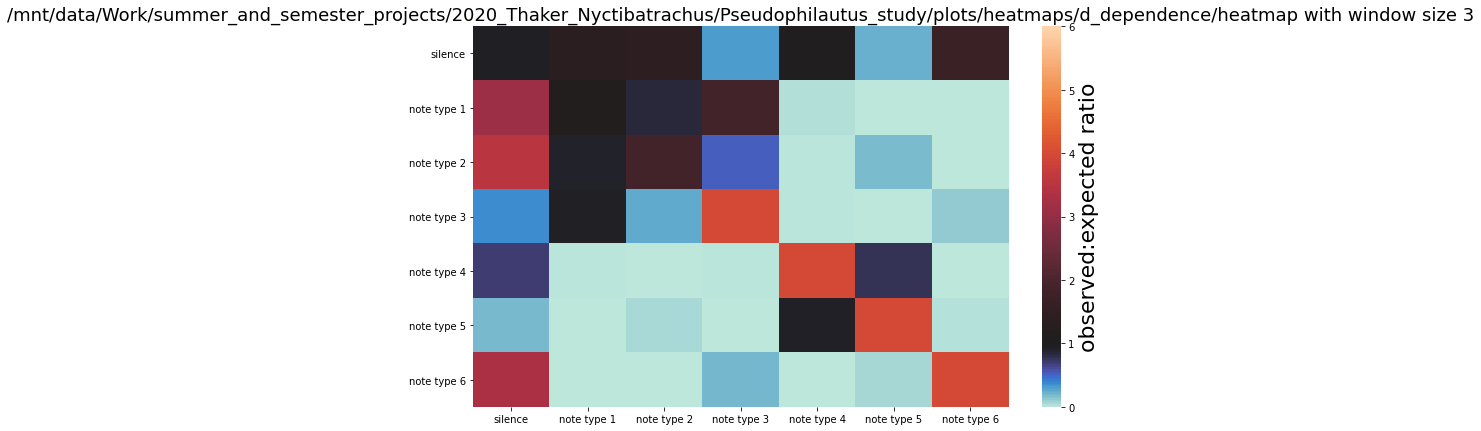

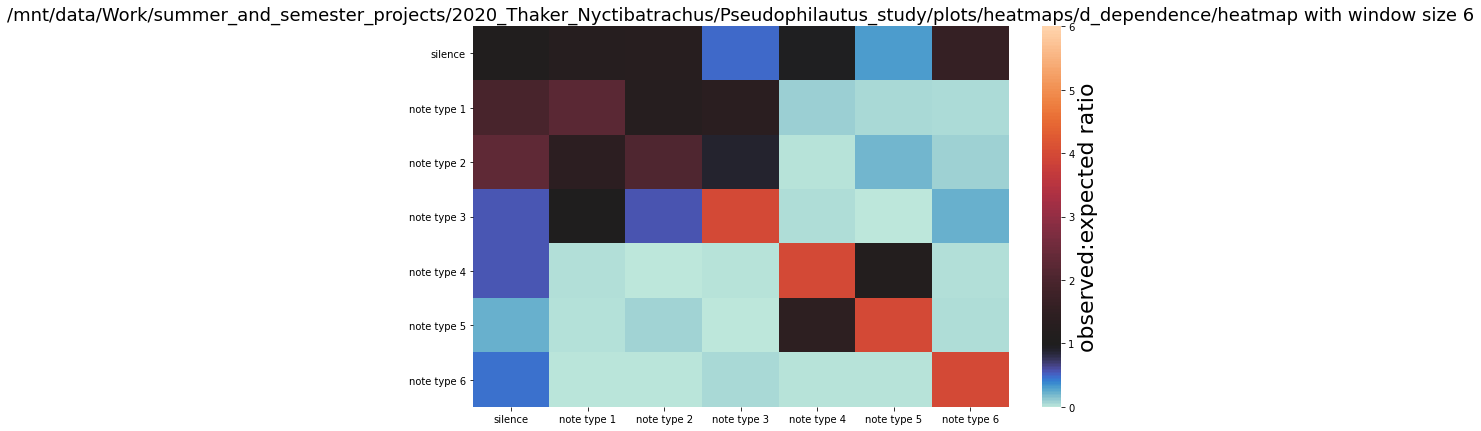

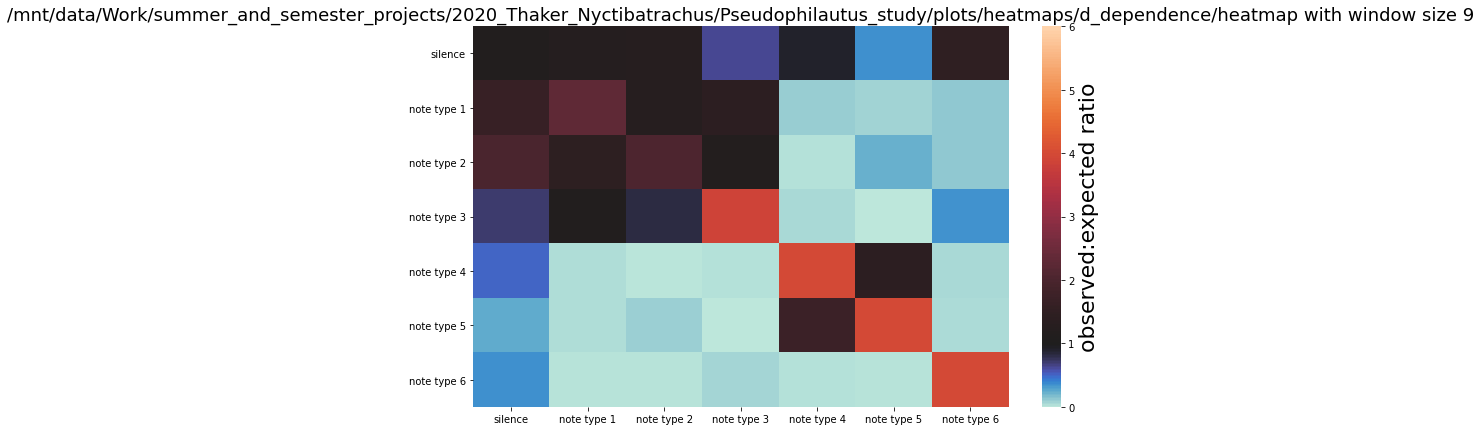

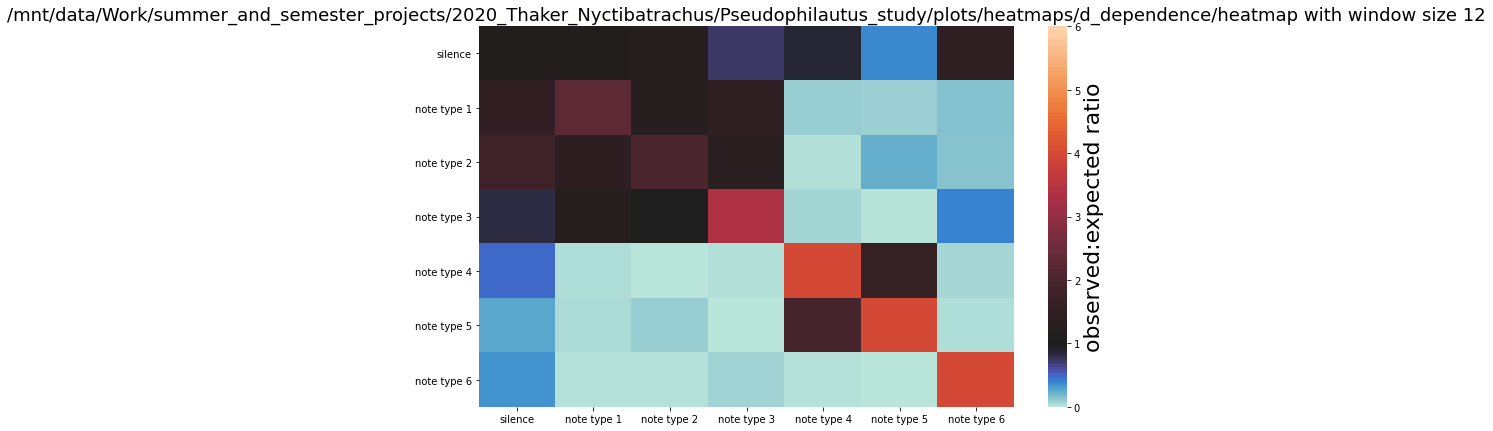

In [26]:
d_dep_pseudo = 'supp_A4/'
for win in range(3, 13, 3):
    file = d_dep_pseudo + "heatmap with window size " + str(win)
    obs, exp = check_for_co_occurrence(
        pseudo_dat,
        col_name='seqlist',
        note_list=['0', '1', '2', '3', '4', '5', '6'],
        win_size=win,
        n=10000,
        runs=50)
    make_heatmap(normalized_deviation(obs, exp, 4),
                 lab=pseudo_lab,
                 title="heatmap with window size " + str(win),
                 save=True,
                 file=file,
                 cmap='icefire',
                 max_allowed=6)

As you can see, the broad trends are unchanged as the $d$ value changes. What _does_ change is only the magnitude of the trends.

# Examining different social contexts

Finally, one can ask how the patterns we see may change with social context. This is not in the paper, I am only including it here for fun.

## _N. humayuni_

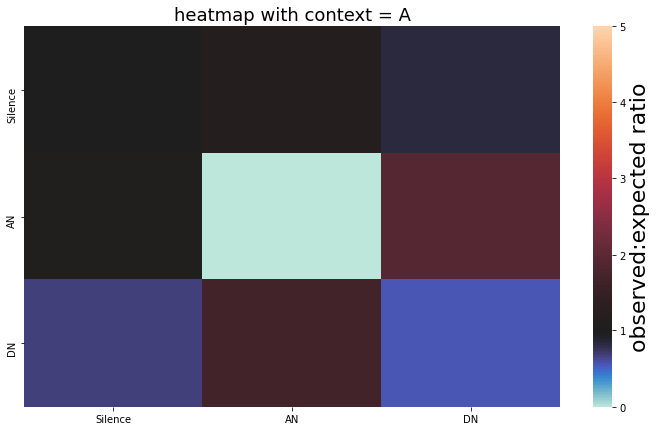

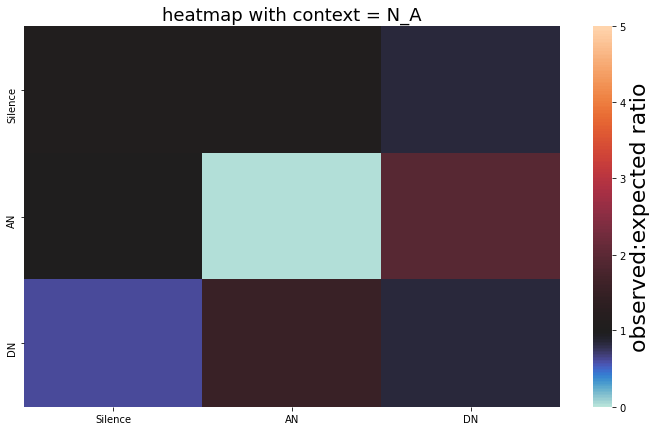

In [41]:
nycti_con = 'nycti_context_dependence/'

for context in np.unique(nycti_dat['contextlist']):

    nycti_subset = nycti_dat[nycti_dat['contextlist'] == context].reset_index(
        drop=True)

    file = "heatmap with context = " + str(context)
    save_path = nycti_con + file
    obs, exp = check_for_co_occurrence(nycti_subset,
                                       col_name='seqlist',
                                       note_list=['0', '1', '2'],
                                       win_size=3,
                                       n=10000,
                                       runs=50)
    make_heatmap(normalized_deviation(obs, exp, 4),
                 lab=nycti_lab,
                 title=file,
                 save=True,
                 file=save_path,
                 cmap='icefire',
                 max_allowed=5)

The primary difference one observes here is that when a male is alone, the discrepancy between observation and expectation is HIGHER for silence than for a DN, whereas the reverse is true when a male is vocalizing with neighbours.

One can also directly compare the observed note co-occurrences in the two contexts, as below:

In [61]:
nycti_A = nycti_dat[nycti_dat['contextlist'] == 'A'].reset_index(drop=True)
nycti_N_A = nycti_dat[nycti_dat['contextlist'] == 'N_A'].reset_index(drop=True)
obs_A = check_for_co_occurrence(nycti_A,
                                col_name='seqlist',
                                note_list=['0', '1', '2'],
                                win_size=3,
                                n=10000,
                                runs=50)[0]
obs_N_A = check_for_co_occurrence(nycti_N_A,
                                  col_name='seqlist',
                                  note_list=['0', '1', '2'],
                                  win_size=3,
                                  n=10000,
                                  runs=50)[0]

In [64]:
obs_N_A

,0,1,2
0,0.354834,0.360219,0.284947
1,0.340156,0.014354,0.645490
2,0.210769,0.505615,0.283616


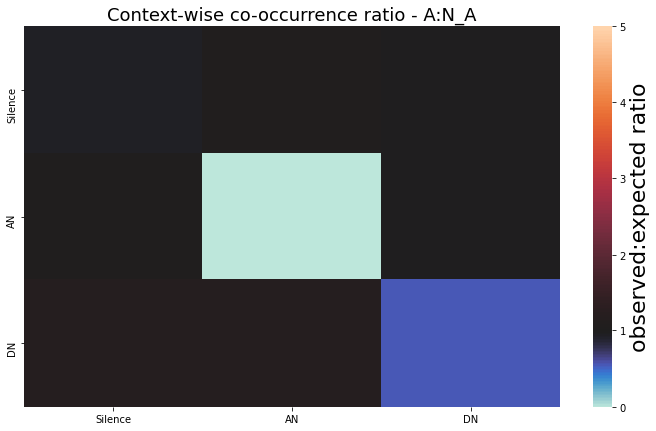

In [62]:
make_heatmap(normalized_deviation(obs_A, obs_N_A, 5),
             lab=nycti_lab,
             title='Context-wise co-occurrence ratio - A:N_A',
             save=False,
             cmap='icefire',
             max_allowed=5)

This tells us that in males that are calling alone, a DN is closely followed by a second DN _much_ less often than is seen in males that are vocalizing with neighbours, recapitulating the finding in our paper that males append DNs in the presence of vocal conspecifics (see main paper).

## _P. amboli_

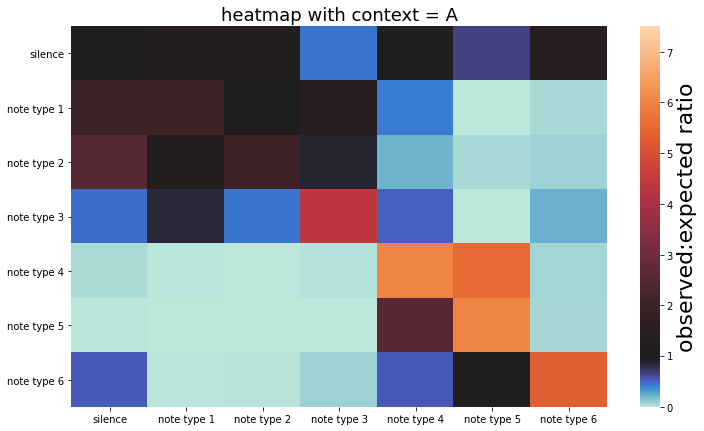

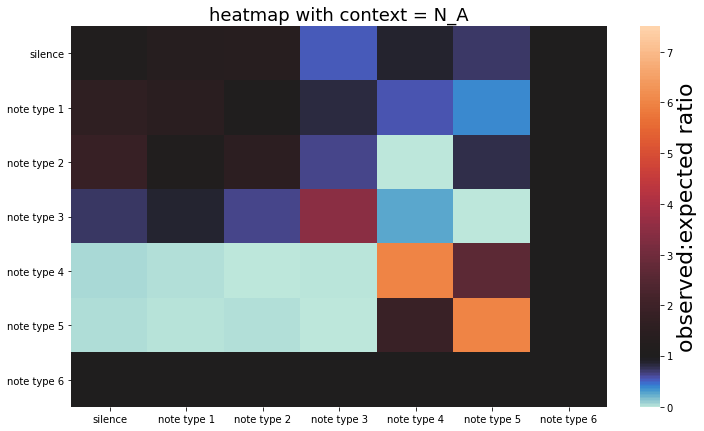

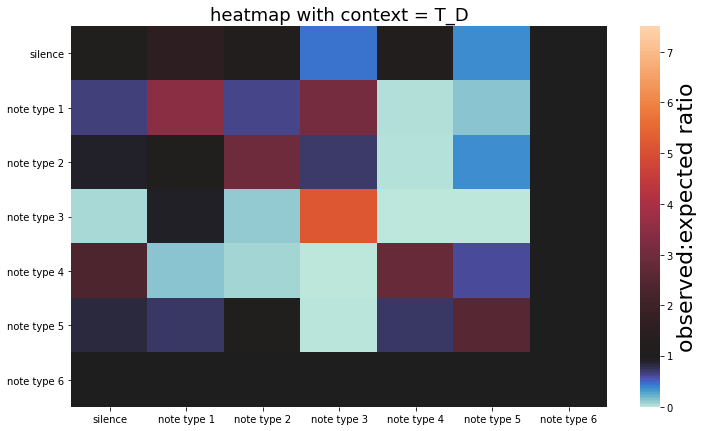

In [43]:
pseudo_con = 'pseudo_context_dependence/'

for context in np.unique(pseudo_dat['contextlist']):

    pseudo_subset = pseudo_dat[pseudo_dat['contextlist'] ==
                               context].reset_index(drop=True)

    file = "heatmap with context = " + str(context)
    save_path = pseudo_con + file
    obs, exp = check_for_co_occurrence(
        pseudo_subset,
        col_name='seqlist',
        note_list=['0', '1', '2', '3', '4', '5', '6'],
        win_size=6,
        n=10000,
        runs=50)
    make_heatmap(normalized_deviation(obs, exp, 6),
                 lab=pseudo_lab,
                 title=file,
                 save=True,
                 file=save_path,
                 cmap='icefire',
                 max_allowed=7.5)